In [ ]:
#E) Spectral Clustering



In [ ]:
#App 1: Identifying marriage patterns in countries, complex relationships.

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    # Extract the two numbers from the age range
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# View the clustered dataset
print(data.head())


C:\Users\Windows10\AppData\Local\Temp\ipykernel_17256\1455199547.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)
C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


       Country Age Group  Sex Marital Status Data Process  Start Year  \
0  Afghanistan   [15-19]  Man       Divorced       Survey        1972   
1  Afghanistan   [20-24]  Man       Divorced       Survey        1972   
2  Afghanistan   [25-29]  Man       Divorced       Survey        1972   
3  Afghanistan   [30-34]  Man       Divorced       Survey        1972   
4  Afghanistan   [35-39]  Man       Divorced       Survey        1972   

   End Year          Data Source  Cluster  
0      1974  National statistics        2  
1      1974  National statistics        2  
2      1974  National statistics        2  
3      1974  National statistics        2  
4      1974  National statistics        1  


C:\Users\Windows10\AppData\Local\Temp\ipykernel_15900\1088828664.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)
C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


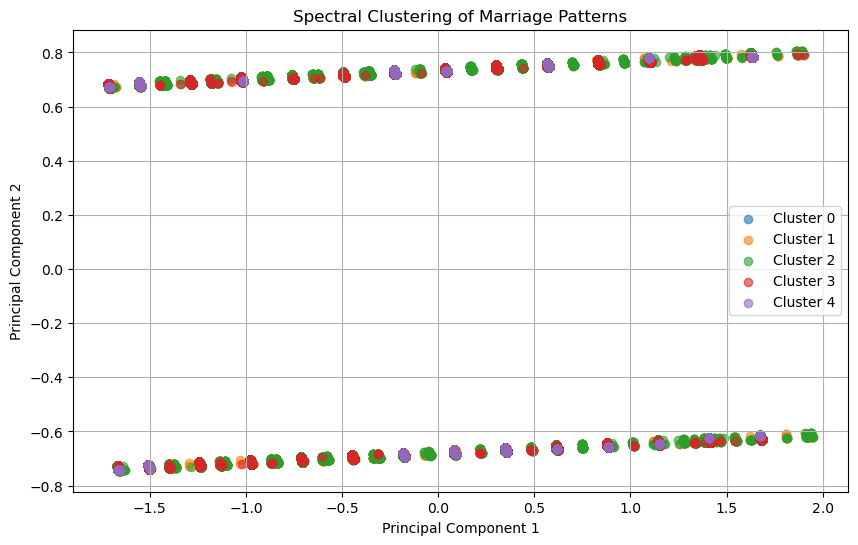

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = X_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Spectral Clustering of Marriage Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#App 2: Geospatial analysis studies marriage patterns' impact.

In [6]:
import pandas as pd

# Example geographical coordinates data
geo_data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
    'Latitude': [33.93911, 41.15303, 28.03389, 42.50779, -11.20269],
    'Longitude': [67.70995, 20.16831, 1.65962, 1.52109, 17.87389]
}

# Convert to DataFrame
geo_df = pd.DataFrame(geo_data)

# Save to CSV
geo_df.to_csv('Geographical_Coordinates.csv', index=False)


In [7]:
# Load the newly created geographical coordinates file
geo_data = pd.read_csv('Geographical_Coordinates.csv')

# Proceed with merging and analysis as previously described


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load the dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Convert Age Group to midpoints
data['Age Group Midpoint'] = data['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data[['Age Group Midpoint']])

# Combine encoded data and scaled age midpoints
X = pd.concat([
    pd.DataFrame(encoded_data.toarray()),
    pd.DataFrame(age_scaled)
], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# View the clustered dataset
print(data.head())


C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


       Country Age Group  Sex Marital Status Data Process  Start Year  \
0  Afghanistan   [15-19]  Man       Divorced       Survey        1972   
1  Afghanistan   [20-24]  Man       Divorced       Survey        1972   
2  Afghanistan   [25-29]  Man       Divorced       Survey        1972   
3  Afghanistan   [30-34]  Man       Divorced       Survey        1972   
4  Afghanistan   [35-39]  Man       Divorced       Survey        1972   

   End Year          Data Source  Age Group Midpoint  Cluster  
0      1974  National statistics                17.0        2  
1      1974  National statistics                22.0        2  
2      1974  National statistics                27.0        2  
3      1974  National statistics                32.0        2  
4      1974  National statistics                37.0        2  


C:\Users\Windows10\AppData\Local\Temp\ipykernel_18240\1088828664.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)
C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


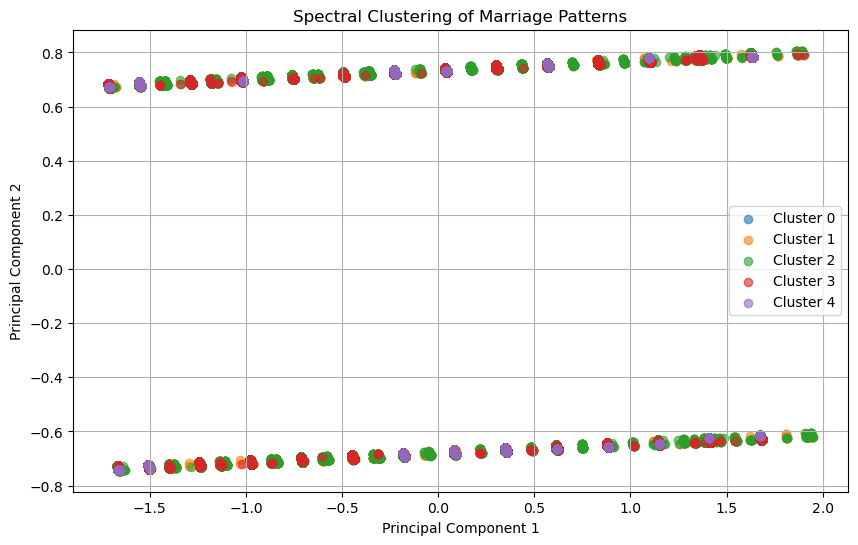

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = X_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Spectral Clustering of Marriage Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
